In [2]:
import random

In [61]:
!cp "/content/drive/MyDrive/P06_c.txt" "./"
!cp "/content/drive/MyDrive/P06_p.txt" "./"
!cp "/content/drive/MyDrive/P06_w.txt" "./"
import matplotlib.pyplot as plt

In [3]:
f=open("./P06_p.txt")

exprofit=f.read().splitlines()
exprofit=[int(x) for x in exprofit]
f.close()

In [4]:
f=open("./P06_w.txt")
exweight=f.read().splitlines()
exweight=[int(x) for x in exweight]
f.close()

In [5]:
f=open("./P06_c.txt")
excapcity=f.read().splitlines()
excapcity=int(excapcity[0])
f.close()

In [6]:
#indivual_list here is [0/1] list for an indivual this function restrain x in domain f=[0,capcity] to return result(profit sum), or it will return 0 for this problem is maximum problem
def knapsack_func_sign_extend(indivual_list,cap,profit,weight):
  vsum=0
  wsum=0
  for i in range(0,len(indivual_list)):
    if indivual_list[i]==1:
      vsum+=profit[i]
      wsum+=weight[i]
  if wsum>cap:
    return 0
  else :
    return vsum




In [7]:
#profit,weight are list read from txt, this code will randomly generate a fucton value>0 solution
def random_generattion(cap,profit,weight):
  a=[random.randint(0,1) for i in range(0,len(profit))]
  while knapsack_func_sign_extend(a,cap,profit,weight)==0:
    a=[random.randint(0,1) for i in range(0,len(profit))]
  return a



In [8]:
#pop_num指定return 的population list[[0/1],[0/1],...]的長度 每個其中的[0/1]為indivual
def random_population_gen(pop_num,cap,profit,weight):
  pol=[]
  #print(type(pop_num))
  for i in range(0,pop_num):
    pol.append(random_generattion(cap,profit,weight))
  return pol


In [9]:
#indivual_list here is [0/1] list for an indivual, for keep from stuck in local maxima
def point_mutation(indivual_list):
  mut_point=random.randint(0,len(indivual_list)-1)
  if indivual_list[mut_point]==0:
    indivual_list[mut_point]=1
  else :
    indivual_list[mut_point]=0
  return indivual_list


In [69]:
#parent_a/b is [0/1] list  for indivual return also [0/1]  for indivual  , for keep from stuck in local maxima
#this function is for randomly choose 1 chromosome(here, 1 item is choose or not) add from randomly one parent
def uniform_cross_over(parent_a,parent_b):
  uni_mask=[random.randint(0,1) for i in range(0,len(parent_a))]
  child=[]
  for i in range(0,len(parent_a)):
    if uni_mask[i]==1:
      child.append(parent_a[i])
    else :
      child.append(parent_b[i])
  return child






In [70]:
#parents_set=由selection_fit給出的經過selection的優等parent 為一[[0/1],[0/1],...] list 每個其中的[0/1]為indivual
#just choose two more stronger(each parent at least better than one indivual in parent set)
def chose_parent_power(parents_set,cap,profit,weight):
  parent_candidate1_indx=random.randint(0,len(parents_set)-1)
  parent_candidate2_indx=random.randint(0,len(parents_set)-1)
  if knapsack_func_sign_extend(parents_set[parent_candidate1_indx],cap,profit,weight)>knapsack_func_sign_extend(parents_set[parent_candidate2_indx],cap,profit,weight):
    return parents_set[parent_candidate1_indx]
  else:
    return parents_set[parent_candidate2_indx]


In [71]:
#now: prof_list 為一[[0/1],[0/1],...] list 每個其中的[0/1]為indivual
# 1. pick indivuals(solution) with higher return value as passing selection
# 2. randomly decide whether some weaker indivuals(solution) to pass the selection to merge into parent list
def adjust_selection_fit(prof_list,pop_num,elite_prob,for_comp_prob,cap,profit,weight):
  a=sorted(prof_list,key=lambda x: knapsack_func_sign_extend(x,cap,profit,weight))
  el=int(elite_prob*len(prof_list))
  eli_a=a[:el]
  comp_a=a[el:]
  for i in comp_a:
    if for_comp_prob>random.random():
      eli_a.append(i)
  return eli_a



In [72]:
#1. pick possible parent set
#2. randomly chose parent from parent set to crossover, and random decide whether need mutation
def generation_produce(parents_set,cap,profit,pop_num,weight,muta_prob,elite_prob,for_comp_prob):
  selected_set=adjust_selection_fit(parents_set,pop_num,elite_prob,for_comp_prob,cap,profit,weight)

  need_offspring=len(parents_set)-len(selected_set)
  next_gen=[]

  while need_offspring>len(next_gen):
    parent_1=chose_parent_power(parents_set,cap,profit,weight)
    parent_2=chose_parent_power(parents_set,cap,profit,weight)
    chil_d=uniform_cross_over(parent_1,parent_2)
    if muta_prob>random.random():
      chil_d=point_mutation(chil_d)
    if knapsack_func_sign_extend(chil_d,cap,profit,weight)>0:
      next_gen.append(chil_d)
  next_gen.extend(selected_set)
  return next_gen






In [73]:
#1. generate 1st generation
#2. sort population, compare where this generation's opt sol is better
#3. generate new population

def genetic_solution(pop_num,cap,profit,weight,geneerations_num,muta_prob,elite_prob,for_comp_prob):

  opt_sol=[0]*len(profit)

  population=random_population_gen(pop_num,cap,profit,weight)
  best_recored=[]
  best_sol_list=[]
  for i in range(0,geneerations_num-1):
    population=sorted(population,reverse=True,key=lambda x: knapsack_func_sign_extend(x,cap,profit,weight))
    if knapsack_func_sign_extend(opt_sol,cap,profit,weight)<knapsack_func_sign_extend(population[0],cap,profit,weight):
      opt_sol=population[0].copy()
    population=generation_produce(population,cap,profit,pop_num,weight,muta_prob,elite_prob,for_comp_prob)
    best_recored.append(knapsack_func_sign_extend(opt_sol,cap,profit,weight))
    best_sol_list.append(opt_sol)
  tot_sol_list=[opt_sol,best_recored,best_sol_list]
  return tot_sol_list



In [104]:
annss=genetic_solution(pop_num=20,cap=170,profit=exprofit,weight=exweight,geneerations_num=100,muta_prob=0.2,elite_prob=0.33,for_comp_prob=0.2)

In [102]:
annss[0]

[0, 1, 0, 1, 0, 0, 1]

Text(0, 0.5, 'profit')

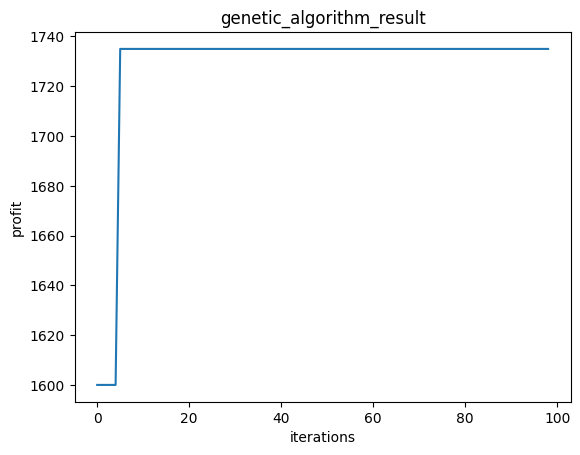

In [105]:
plt.plot(annss[1])
plt.title("genetic_algorithm_result")
plt.xlabel("iterations")
plt.ylabel("profit")

In [99]:
mut_005=[]
for i in range(0,1000):
  bss=genetic_solution(pop_num=20,cap=170,profit=exprofit,weight=exweight,geneerations_num=100,muta_prob=0.05,elite_prob=0.33,for_comp_prob=0.2)
  mut_005.append(knapsack_func_sign_extend(bss[0],170,exprofit,exweight))

mut_010=[]
for i in range(0,1000):
  css=genetic_solution(pop_num=20,cap=170,profit=exprofit,weight=exweight,geneerations_num=100,muta_prob=0.1,elite_prob=0.33,for_comp_prob=0.2)
  mut_010.append(knapsack_func_sign_extend(css[0],170,exprofit,exweight))

mut_020=[]
for i in range(0,1000):
  dss=genetic_solution(pop_num=20,cap=170,profit=exprofit,weight=exweight,geneerations_num=100,muta_prob=0.2,elite_prob=0.33,for_comp_prob=0.2)
  mut_020.append(knapsack_func_sign_extend(dss[0],170,exprofit,exweight))

mut_040=[]
for i in range(0,1000):
  ess=genetic_solution(pop_num=20,cap=170,profit=exprofit,weight=exweight,geneerations_num=100,muta_prob=0.1,elite_prob=0.33,for_comp_prob=0.2)
  mut_040.append(knapsack_func_sign_extend(ess[0],170,exprofit,exweight))





In [100]:
a_005=0
a_010=0
a_020=0
a_040=0
for i in range(0,len(mut_040)):
  if mut_040[i]==1735:
    a_040+=1
  if mut_020[i]==1735:
    a_020+=1
  if mut_010[i]==1735:
    a_010+=1
  if mut_005[i]==1735:
    a_005+=1
print(a_005)
print(a_010)
print(a_020)
print(a_040)

659
720
878
718
